<a href="https://colab.research.google.com/github/NurlailyAsrobika16/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya. 


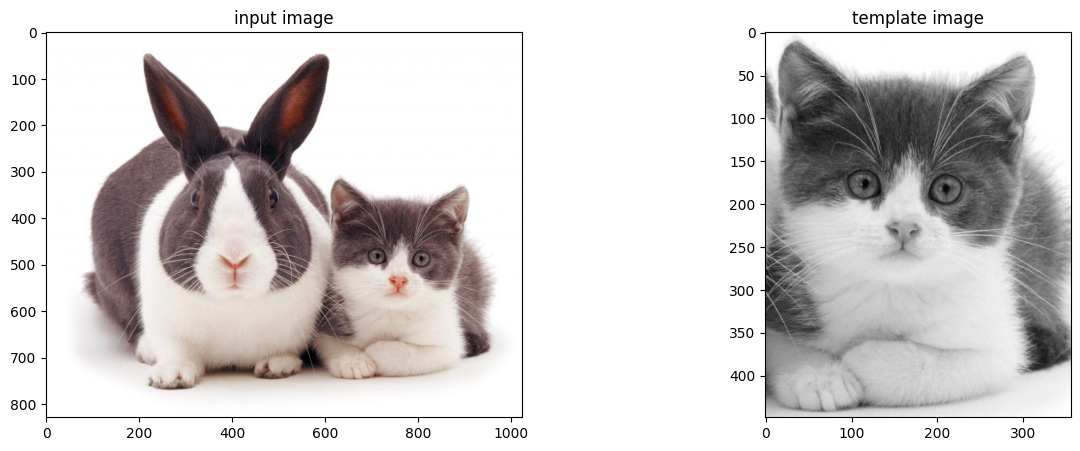

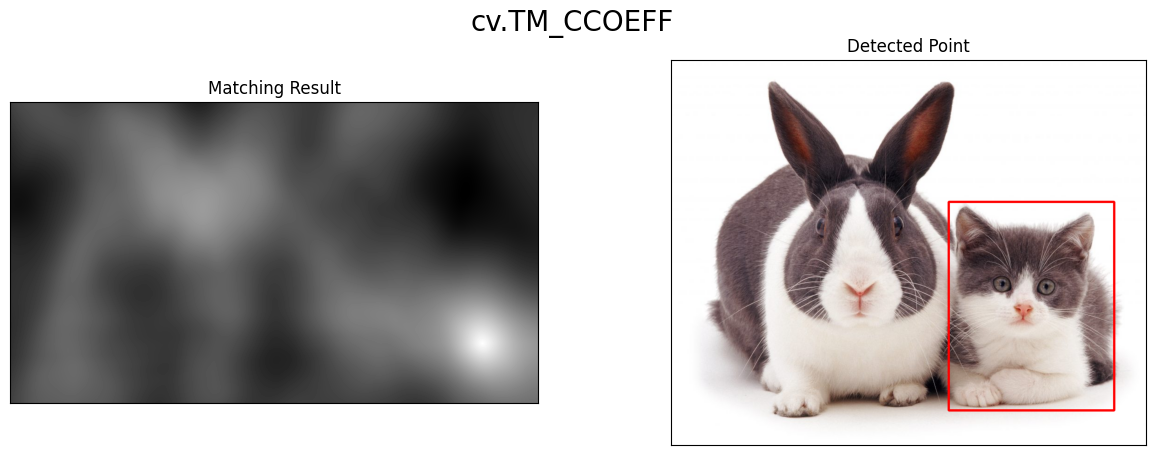

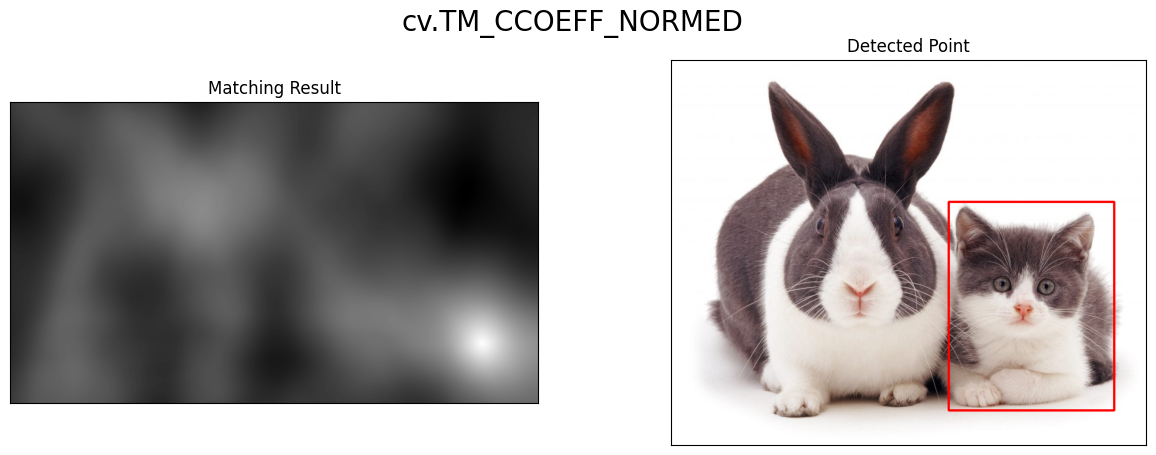

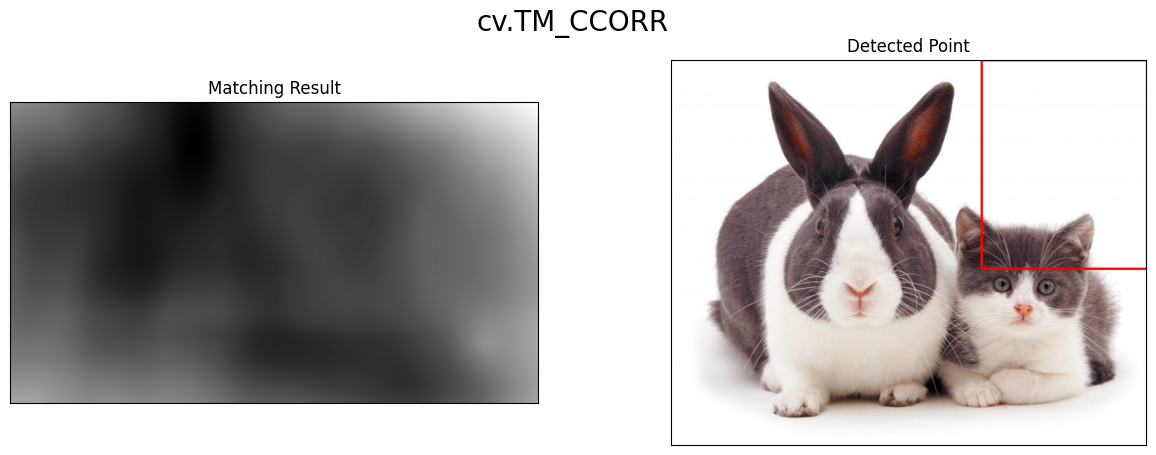

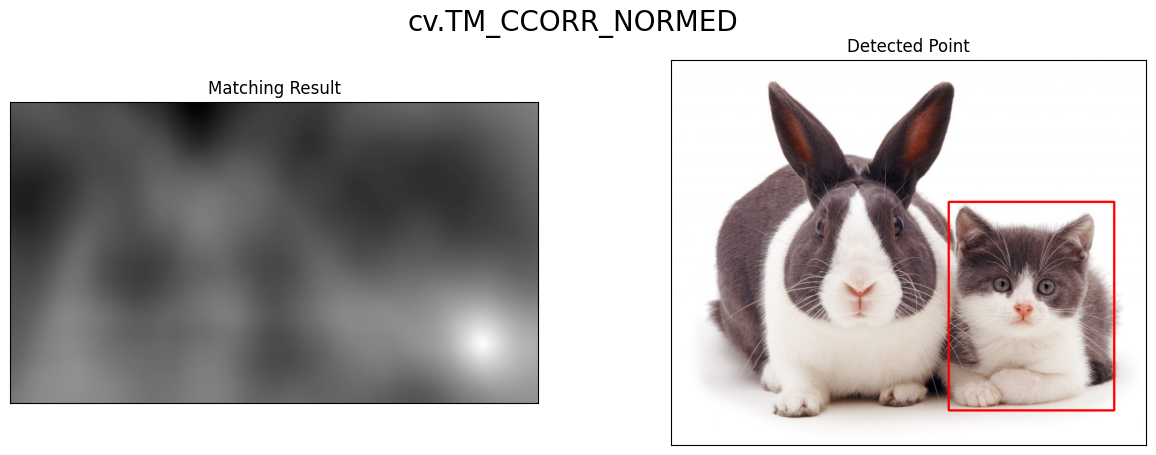

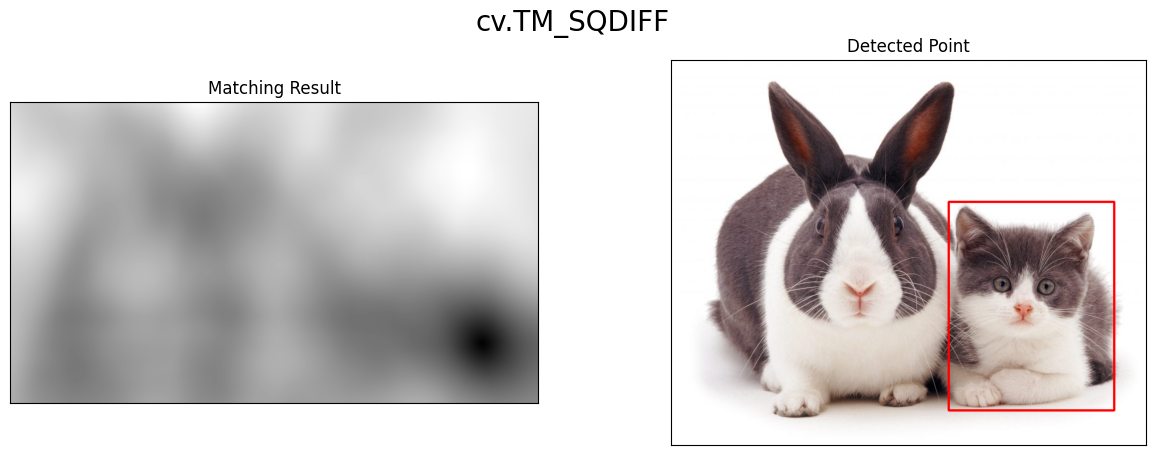

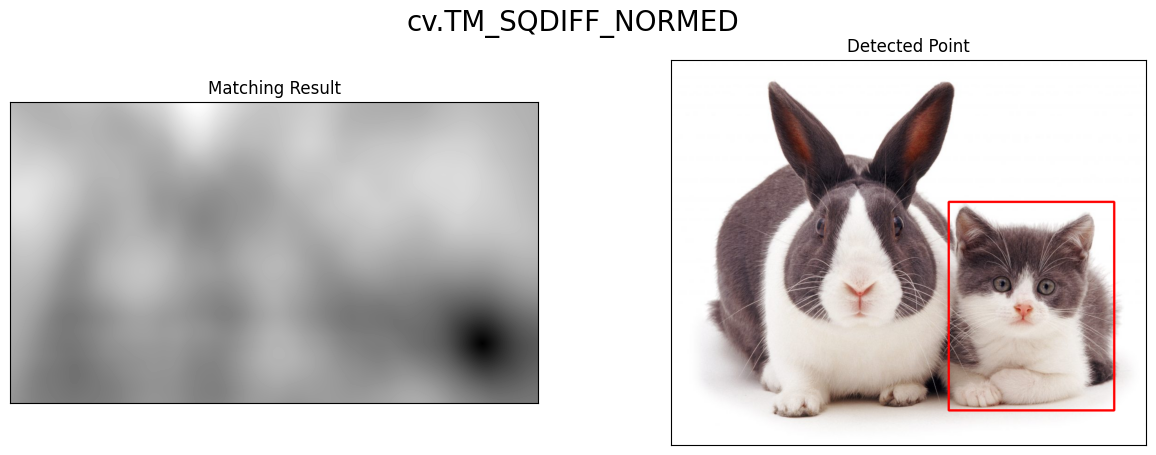

In [3]:
# load citra input 
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra 
template = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/cat2_templatejpg.jpg',0)
# dimensi 
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Menambahkan 6 method untuk perbandingan
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Terapkan Pencocokan template
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Jika methodnya adalah TM_SQDIFF atau TM_SQDIFF_NORMED, maka ambil minimumnya
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()
     
     


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template

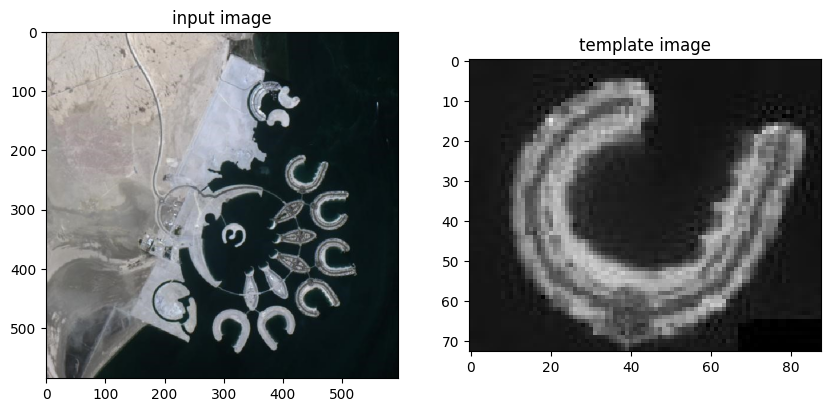

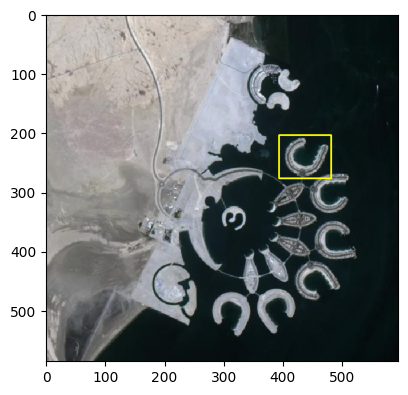

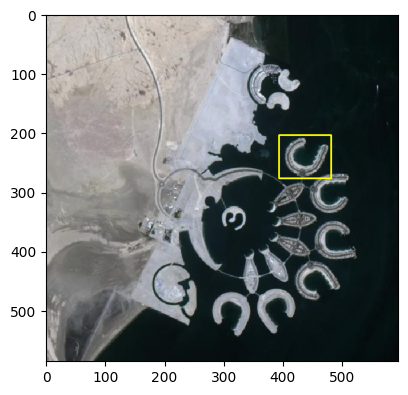

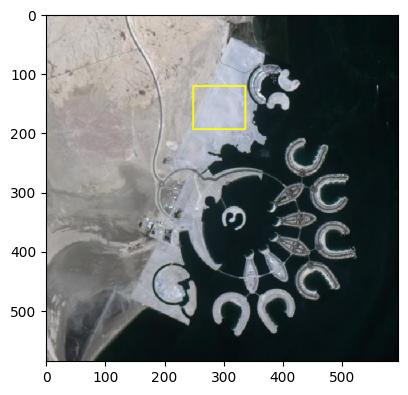

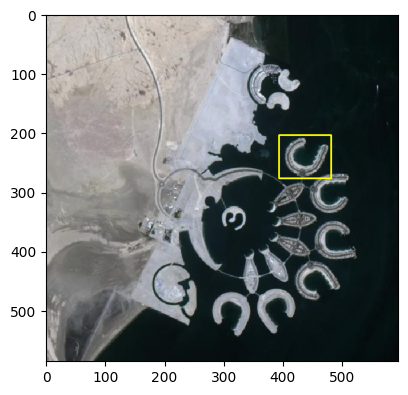

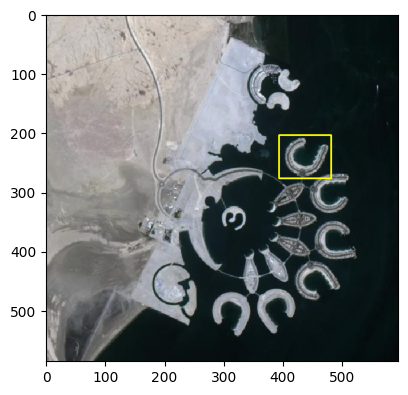

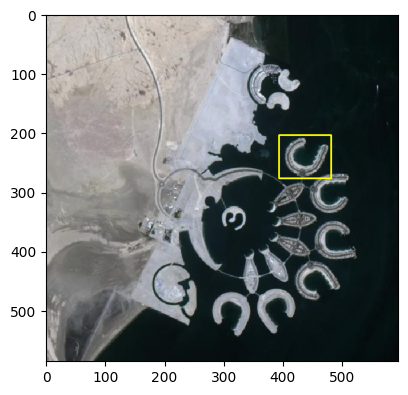

In [4]:
# load citra input 
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/bahrain.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/bahrain-template.jpg',0)

# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(10,5)) 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

#mengevaluasi setiap fungsi pada variabel methods
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Terapkan Pencocokan template
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Jika methodnya adalah TM_SQDIFF atau TM_SQDIFF_NORMED, maka ambil minimumnya
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,255,255),2)
    plt.figure(figsize=(10,5))
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

**a. Sobel Edge Detection**

Text(0.5, 1.0, 'Sobel Image')

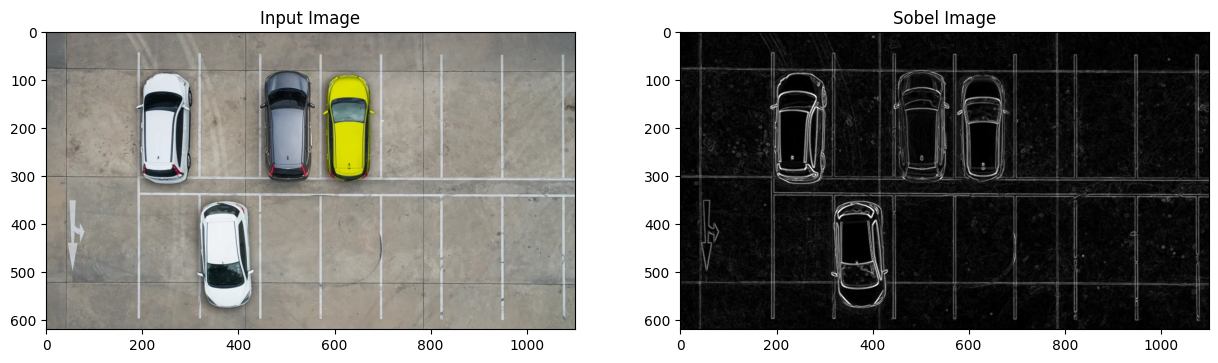

In [5]:
img3 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/car-park.jpg') 

# mengonversi ke greyscale
gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

# menghapus noise
gray = cv.GaussianBlur(gray, (3,3), 0)

# mendapatkan pemfilteran Sobel horizontal dan vertikal dari gambar
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)

# menerapkan gambar dengan kernel Sobel horizontal dan vertikal 
sobel = cv.addWeighted(cv.convertScaleAbs(sobelx), 0.5, cv.convertScaleAbs(sobely), 0.5, 0)

f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
axarr[0].set_title("Input Image")
axarr[1].imshow(sobel, cmap='gray')
axarr[1].set_title("Sobel Image")
     

**b. Canny Edge Detection**

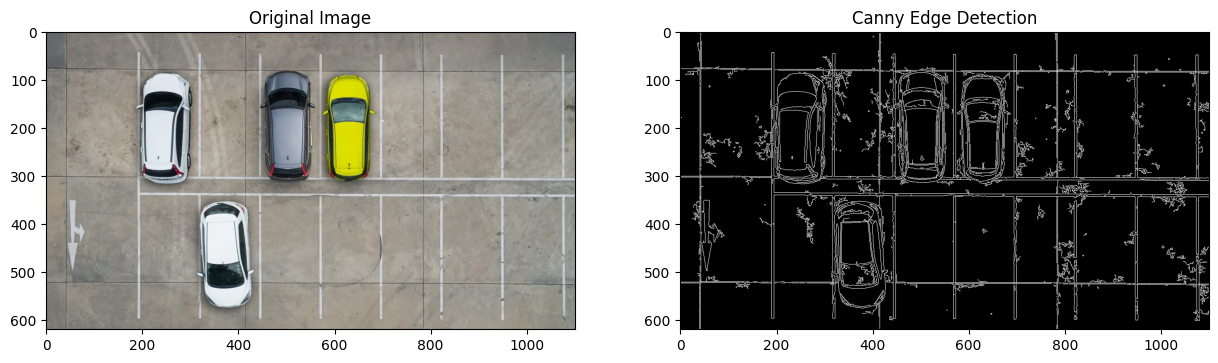

In [7]:
image_ori = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/car-park.jpg', cv.IMREAD_COLOR)

# menghapus noise
image_gray = cv.cvtColor(image_ori, cv.COLOR_BGR2GRAY)
filtered_image = cv.Canny(image_gray, threshold1=20, threshold2=200)

# output
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
ax2.title.set_text('Canny Edge Detection')
ax2.imshow(filtered_image, cmap='gray')
     

**c. Laplacian Edge Detection**

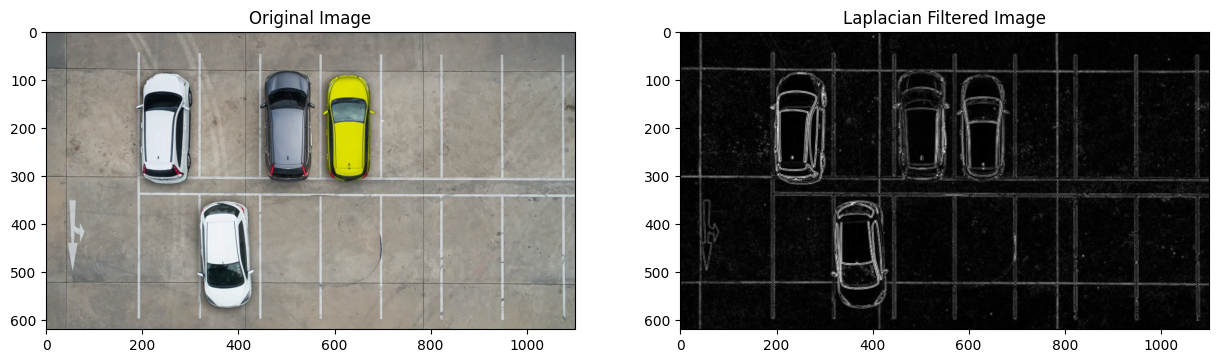

In [8]:
image_original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/car-park.jpg')
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(image_gray,(3,3),0)

filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

filtered_image = cv.convertScaleAbs(filtered_image)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

**a.Harris Corner Detection** 

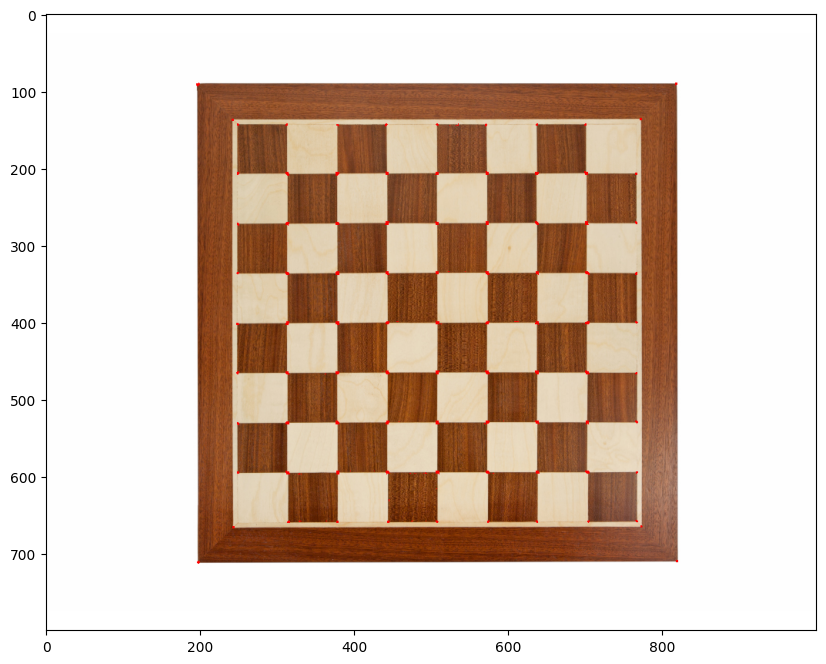

In [11]:
input_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)

#melakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(17,8)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
     

**b. Shi-Tomasi Detection**

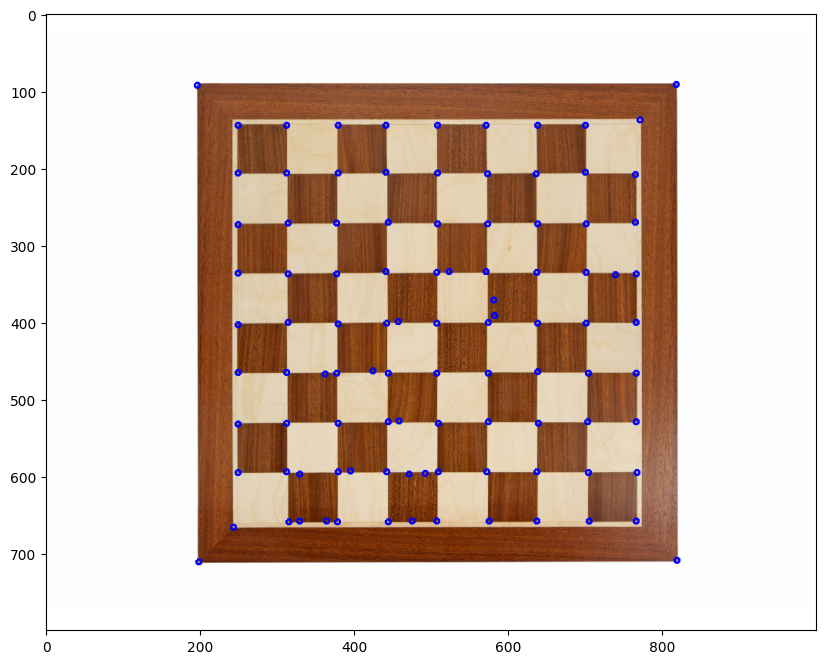

In [13]:
input_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(17,8)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg.

number of Hough lines: 33


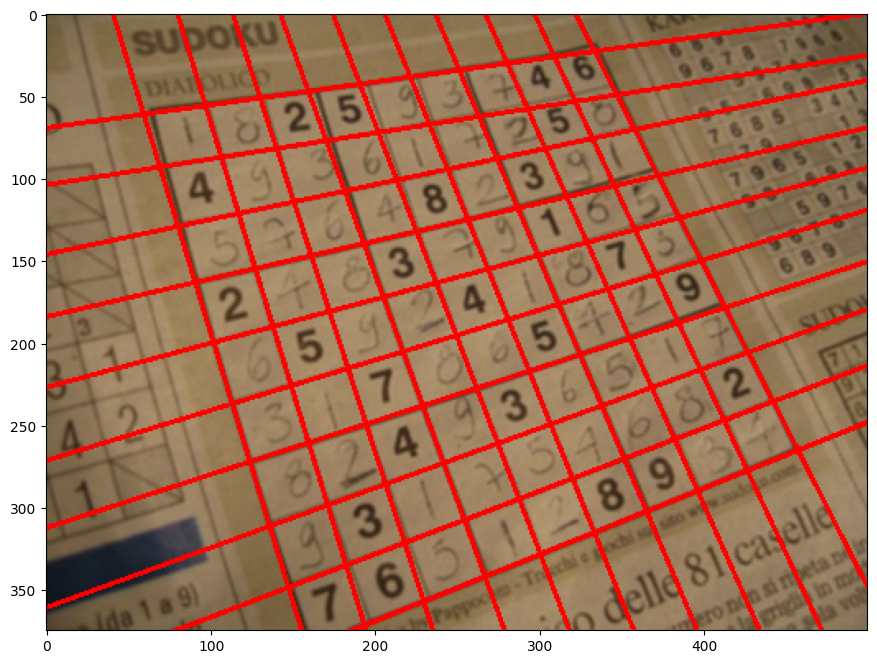

In [16]:

input_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/sudoku.jpg') 
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)
kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)
kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)
lines = cv.HoughLines(edges,1,np.pi/180,150)

if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

#            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines
    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(17,8)) 
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg,

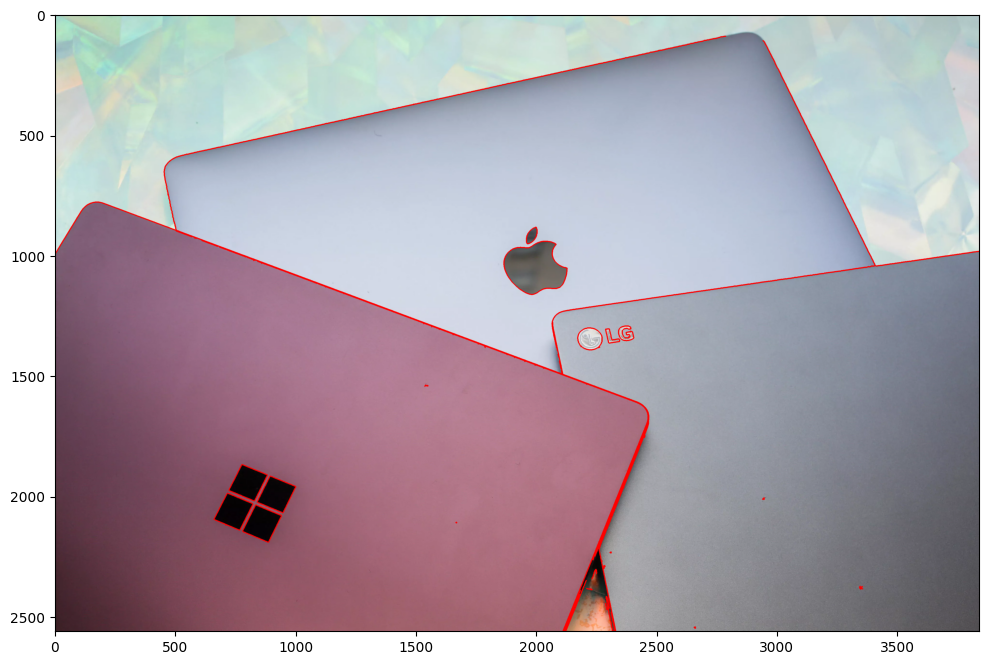

In [18]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(17,8)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
     